# Logistic Regression - Binary

In [1]:
import numpy as np
import sklearn
import gzip
from matplotlib import pyplot as plt
# These are some parameters to make figures nice (and big)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Read Data

In [2]:
# Training data

# images
f = gzip.open('train-images-idx3-ubyte.gz','r')
image_size = 28
n_images_train = 50000

f.read(16)
buf = f.read(image_size * image_size * n_images_train)
data_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_train = data_train.reshape(n_images_train, image_size, image_size)
data_train=data_train/255

# labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
labels_train=np.zeros(n_images_train)
for i in range(0,n_images_train):   
    buf = f.read(1)
    labels_train[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_train=labels_train.astype(int)    

In [3]:
# Test data

#images
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
image_size = 28
n_images_test = 10000
f.read(16)
buf = f.read(image_size * image_size * n_images_test)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(n_images_test, image_size, image_size)
data_test = data_test/255

#labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
labels_test=np.zeros(n_images_test)
for i in range(0,n_images_test):   
    buf = f.read(1)
    labels_test[i]=np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0]
labels_test=labels_test.astype(int)    

In [4]:
data_test  = data_test[labels_test<2]
labels_test=labels_test[labels_test<2]

data_train = data_train[labels_train<2]
labels_train=labels_train[labels_train<2]

n_images_train=len(labels_train)
n_images_test=len(labels_test)


# Inspect Raw Data 
## Data shape

In [5]:
# let's look at the data shape

print('training data')
print(data_train.shape)
print(labels_train.shape)
print(' ')
print('test data')
print(data_test.shape)
print(labels_test.shape)
print(' ')
print(labels_train[0:5])


training data
(10610, 28, 28)
(10610,)
 
test data
(2115, 28, 28)
(2115,)
 
[0 1 1 1 1]


## Plot

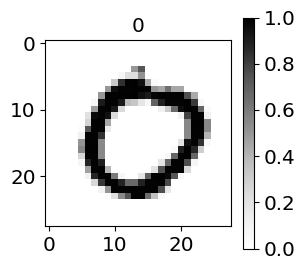

In [6]:
plt.figure(figsize=[3,3])

ind=np.random.randint(0,n_images_train)
plt.imshow(data_train[ind],cmap=plt.get_cmap('Greys'));
plt.title(labels_train[ind]); 
plt.colorbar();

# Restructure raw data into input data

In [7]:
X_train=data_train.reshape(n_images_train,28*28)
y_train=labels_train
print(X_train.shape)
print(y_train.shape)

(10610, 784)
(10610,)


In [8]:
X_test=data_test.reshape(n_images_test,28*28)
y_test=labels_test
print(X_test.shape)
print(y_test.shape)

(2115, 784)
(2115,)


# Logistic Regression

In [9]:
from sklearn import linear_model
#Define architecture (hyperparameters) 
logreg_obj=linear_model.LogisticRegression(max_iter=5000)

# fit model (learn parameters)
logreg=logreg_obj.fit(X_train,y_train)

# make predictions
yhat_test=logreg.predict(X_test)


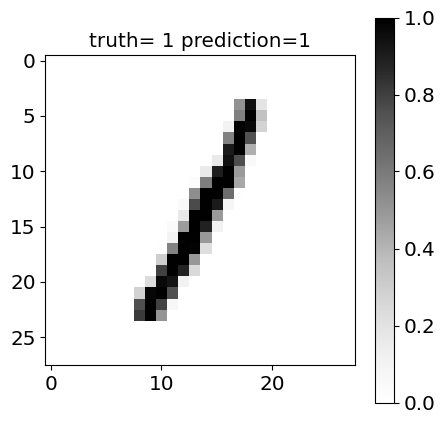

In [21]:
plt.figure(figsize=[5,5])

ind=np.random.randint(0,n_images_test)
plt.imshow(data_test[ind],cmap=plt.get_cmap('Greys'));
plt.title('truth= '+str(y_test[ind])+' prediction='+str(yhat_test[ind])); 
plt.colorbar();

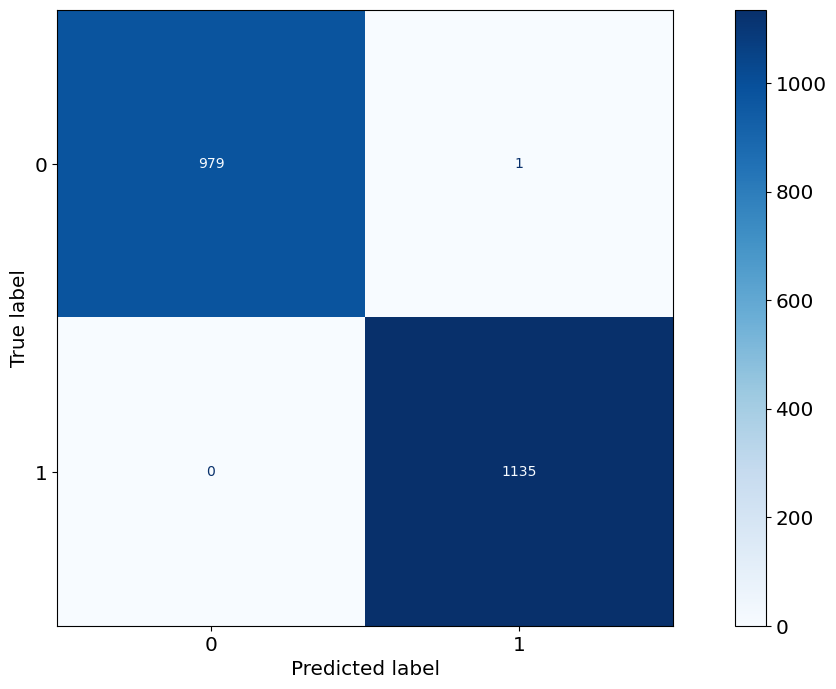

In [26]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix)

ConfusionMatrixDisplay.from_predictions(y_test, yhat_test,cmap=plt.cm.Blues)

# Visualize 

([<matplotlib.axis.XTick at 0x147782750>],
 [Text(15, 0, '$\\beta_0+\\sum_j \\beta_j x_j=$-22.03')])

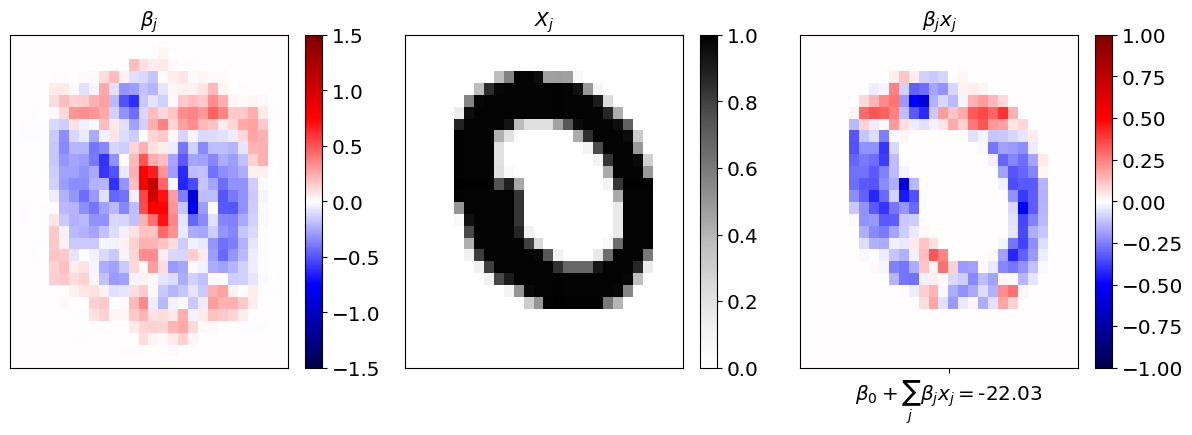

In [33]:
ind=np.random.randint(0,n_images_test)

sensitivity=logreg.coef_.reshape(28,28)
heatmap=(X_test[ind,:]*logreg.coef_)
heatmap=heatmap.reshape(28,28)

plt.figure(figsize=[12,4])


plt.subplot(1,3,1)
plt.pcolor(sensitivity)
plt.colorbar()
plt.set_cmap('seismic')
plt.clim(-1.5,1.5)
plt.xticks([])
plt.yticks([])
plt.title(r'$\beta_j$')

plt.subplot(1,3,2)
plt.pcolor(data_test[ind])
plt.colorbar()
plt.set_cmap('Greys')
plt.clim(0,1)
plt.xticks([])
plt.yticks([])
plt.title(r'$X_j$')


plt.subplot(1,3,3)
plt.pcolor(heatmap)
plt.colorbar()
plt.set_cmap('seismic')
plt.clim(-1,1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.title(r'$\beta_j x_j$')
plt.xticks(ticks=[15],labels=[r'$\beta_0+\sum_j \beta_j x_j=$'+str(np.round(np.sum(np.sum(heatmap))+logreg.intercept_[0],2))])

# Neural Net

In [ ]:
from sklearn import neural_network
model=neural_network.MLPClassifier(hidden_layer_sizes=[256,128],max_iter=1000,alpha=0.001)
mnist=model.fit(X_train,y_train)

In [ ]:
y_hat=mnist.predict(X_test)
score=sklearn.metrics.accuracy_score(mnist.predict(X_test),y_test)
print((1-score)*100)

In [ ]:
ind=np.random.randint(0,n_images_test)

plt.imshow(data_test[ind],cmap=plt.get_cmap('Greys'));
plt.title('truth= '+str(y_test[ind])+' prediction='+str(y_hat[ind])); 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_hat)
plot_confusion_matrix(y_test, y_hat, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)